# Summarization and Emotion Detection on NYT Bestselling Books

In [1]:
# Step 1: Install Required Libraries
!pip install sumy text2emotion

In [2]:
!pip install emoji==1.6.3  # Downgrade emoji version for text2emotion compatibility

In [8]:
# Step 2: Load Libraries
import pandas as pd
from textblob import TextBlob
import text2emotion as te
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
import matplotlib.pyplot as plt


import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
# Step 3: Load Dataset
print("\n--- Loading Dataset ---")
# Load the CSV file containing the NYT bestsellers data
df = pd.read_csv('/content/nyt_books_clean.csv')

# Drop missing descriptions
# Ensure there are no missing values in the Description column
descriptions = df['Description'].dropna().tolist()


--- Loading Dataset ---


In [10]:
# Step 4: Summarization (Using Sumy)
print("\n--- Summarizing Book Descriptions ---")

# Create a list to store summaries
summaries = []
for desc in descriptions:
    try:
        # Summarize each description
        parser = PlaintextParser.from_string(desc, Tokenizer('english'))
        summarizer = LexRankSummarizer()
        summary_sentences = summarizer(parser.document, sentences_count=2)
        summary = ' '.join([str(sentence) for sentence in summary_sentences])
        summaries.append(summary if summary else desc)
    except Exception as e:
        # In case summarization fails, keep the original description
        summaries.append(desc)

# Add the summaries to the DataFrame
df['Summary'] = summaries


--- Summarizing Book Descriptions ---


In [11]:
df

,Title,Author,Publisher,Description,Summary
0,ABUNDANCE,Ezra Klein and Derek Thompson,Avid Reader,A New York Times opinion columnist and a staff...,A New York Times opinion columnist and a staff...
1,EVERYTHING IS TUBERCULOSIS,John Green,Crash Course,The author of “The Anthropocene Reviewed” chro...,The author of “The Anthropocene Reviewed” chro...
2,THE ANXIOUS GENERATION,Jonathan Haidt,Penguin Press,A co-author of “The Coddling of the American M...,A co-author of “The Coddling of the American M...
3,ON TYRANNY,Timothy Snyder,Crown,Twenty lessons from the 20th century about the...,Twenty lessons from the 20th century about the...
4,FIGHT,Jonathan Allen and Amie Parnes,Morrow,The authors of “Shattered” give an account of ...,The authors of “Shattered” give an account of ...
5,FAHRENHEIT-182,Mark Hoppus with Dan Ozzi,Dey Street,The singer and bassist for the pop-punk band B...,The singer and bassist for the pop-punk band B...
6,THE BODY KEEPS THE SCORE,Bessel van der Kolk,Penguin,"How trauma affects the body and mind, and inno...","How trauma affects the body and mind, and inno..."
7,ON DEMOCRACIES AND DEATH CULTS,Douglas Murray,Broadside,The author of “The War on the West” gives his ...,The author of “The War on the West” gives his ...
8,CARELESS PEOPLE,Sarah Wynn-Williams,Flatiron,A former Facebook executive gives an account o...,A former Facebook executive gives an account o...
9,JOHN & PAUL,Ian Leslie,Celadon,The 23-year relationship between John Lennon a...,The 23-year relationship between John Lennon a...


In [12]:
# Step 5: Emotion Detection (Using text2emotion)
print("\n--- Detecting Emotions in Descriptions ---")

# Create a list to store emotion dictionaries
emotions = []
for desc in descriptions:
    # Detect emotions for each description
    emotion_scores = te.get_emotion(desc)
    emotions.append(emotion_scores)

# Convert the list of emotion dictionaries into a DataFrame
emotion_df = pd.DataFrame(emotions)

# Concatenate the emotion DataFrame with the original DataFrame
df = pd.concat([df, emotion_df], axis=1)


--- Detecting Emotions in Descriptions ---


In [13]:
df

,Title,Author,Publisher,Description,Summary,Happy,Angry,Surprise,Sad,Fear
0,ABUNDANCE,Ezra Klein and Derek Thompson,Avid Reader,A New York Times opinion columnist and a staff...,A New York Times opinion columnist and a staff...,0.0,0.00,0.00,0.00,0.00
1,EVERYTHING IS TUBERCULOSIS,John Green,Crash Course,The author of “The Anthropocene Reviewed” chro...,The author of “The Anthropocene Reviewed” chro...,0.0,0.00,0.00,1.00,0.00
2,THE ANXIOUS GENERATION,Jonathan Haidt,Penguin Press,A co-author of “The Coddling of the American M...,A co-author of “The Coddling of the American M...,0.0,0.33,0.33,0.00,0.33
3,ON TYRANNY,Timothy Snyder,Crown,Twenty lessons from the 20th century about the...,Twenty lessons from the 20th century about the...,0.0,0.00,0.00,0.00,0.00
4,FIGHT,Jonathan Allen and Amie Parnes,Morrow,The authors of “Shattered” give an account of ...,The authors of “Shattered” give an account of ...,0.0,0.00,0.00,0.33,0.67
5,FAHRENHEIT-182,Mark Hoppus with Dan Ozzi,Dey Street,The singer and bassist for the pop-punk band B...,The singer and bassist for the pop-punk band B...,0.0,0.00,0.00,0.00,1.00
6,THE BODY KEEPS THE SCORE,Bessel van der Kolk,Penguin,"How trauma affects the body and mind, and inno...","How trauma affects the body and mind, and inno...",0.0,0.00,0.67,0.33,0.00
7,ON DEMOCRACIES AND DEATH CULTS,Douglas Murray,Broadside,The author of “The War on the West” gives his ...,The author of “The War on the West” gives his ...,0.0,0.00,0.00,1.00,0.00
8,CARELESS PEOPLE,Sarah Wynn-Williams,Flatiron,A former Facebook executive gives an account o...,A former Facebook executive gives an account o...,0.0,0.00,0.00,0.00,1.00
9,JOHN & PAUL,Ian Leslie,Celadon,The 23-year relationship between John Lennon a...,The 23-year relationship between John Lennon a...,0.0,0.00,0.00,0.00,1.00


In [14]:
# Step 6: Display Final Data
print("\n--- Final Data with Summaries and Emotions ---")
# Display a preview of the final DataFrame
print(df[['Title', 'Summary', 'Happy', 'Angry', 'Surprise', 'Sad', 'Fear']].head())


--- Final Data with Summaries and Emotions ---
                        Title  \
0                   ABUNDANCE   
1  EVERYTHING IS TUBERCULOSIS   
2      THE ANXIOUS GENERATION   
3                  ON TYRANNY   
4                       FIGHT   

                                             Summary  Happy  Angry  Surprise  \
0  A New York Times opinion columnist and a staff...    0.0   0.00      0.00   
1  The author of “The Anthropocene Reviewed” chro...    0.0   0.00      0.00   
2  A co-author of “The Coddling of the American M...    0.0   0.33      0.33   
3  Twenty lessons from the 20th century about the...    0.0   0.00      0.00   
4  The authors of “Shattered” give an account of ...    0.0   0.00      0.00   

    Sad  Fear  
0  0.00  0.00  
1  1.00  0.00  
2  0.00  0.33  
3  0.00  0.00  
4  0.33  0.67  



--- Saving Enhanced Dataset ---
Enhanced data saved to: /content/nyt_books_summarized_emotions.csv

--- Visualizing Overall Emotions ---


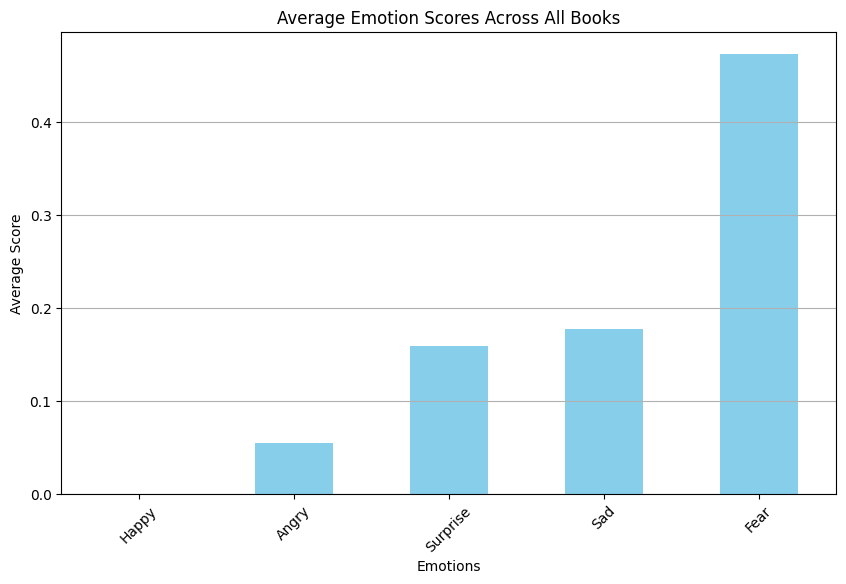

In [15]:
# Step 7: Save the Output
print("\n--- Saving Enhanced Dataset ---")
# Save the enhanced dataset with summaries and emotions to a new CSV file
output_path = '/content/nyt_books_summarized_emotions.csv'
df.to_csv(output_path, index=False)
print(f"Enhanced data saved to: {output_path}")

# Step 8: Visualization of Emotions
print("\n--- Visualizing Overall Emotions ---")

# Calculate the average emotion score across all books
emotion_means = df[['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']].mean()

# Create a bar plot
plt.figure(figsize=(10,6))
emotion_means.plot(kind='bar', color='skyblue')
plt.title('Average Emotion Scores Across All Books')
plt.ylabel('Average Score')
plt.xlabel('Emotions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
